In [1]:
#dependencies and setup
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
sns.set(style='ticks',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

import requests
import json
from pprint import pprint


#import spotify keys
from config import client_id
from config import client_secret

In [2]:
#from: https://stmorse.github.io/journal/spotify-api.html

AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [3]:
#from: https://stmorse.github.io/journal/spotify-api.html

#base URL for Spotify API
base_url = 'https://api.spotify.com/v1/'

#In order to access, we send a properly formed GET request to the API server, with our access_token in the header. Let’s save this header info now, in the following very specific format:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [4]:
#import global top songs csv
global_songs_df = pd.read_csv("resources/global-weekly-2022-06-02.csv")

#extracting track id (removing "spotify:track:")
track_id_series = global_songs_df.uri.str[14:]

#convert to df and rename column
track_id_df = track_id_series.to_frame().rename(columns={"uri":"track_id"})

#merge dfs
cleaned_global_df = global_songs_df.merge(track_id_df, how="inner", left_index=True, right_index=True)

#pare down columns
cleaned_global_df = cleaned_global_df[["rank", "track_id", "artist_names", "track_name", "peak_rank", "previous_rank", "weeks_on_chart", "streams"]]
cleaned_global_df.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704


In [5]:
#empty lists to store song data
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
id_num = []
track_href = []
analysis_url = []
duration_mins = []
time_signature = []

In [6]:
for t in cleaned_global_df["track_id"]:
    response = requests.get(base_url + 'audio-features/' + t, headers=headers).json()
    
    #fill in track info for each audio feature / empty list
    danceability.append(response["danceability"])
    energy.append(response["energy"])
    key.append(response["key"])
    loudness.append(response["loudness"])
    mode.append(response["mode"])
    speechiness.append(response["speechiness"])
    acousticness.append(response["acousticness"])
    instrumentalness.append(response["instrumentalness"])
    liveness.append(response["liveness"])
    valence.append(response["valence"])
    tempo.append(response["tempo"])
    id_num.append(response["id"])
    track_href.append(response["track_href"])
    analysis_url.append(response["analysis_url"])    
    #duration recorded in api in milliseconds, converting to minutes here
    duration_mins.append(round((response["duration_ms"] / 60000),2))
    time_signature.append(response["time_signature"])    

In [7]:
songs_dict = {
    "track_id": id_num,
    "danceability": danceability,
    "energy": energy,
    "key": key,
    "loudness": loudness,
    "mode": mode,
    "speechiness": speechiness,
    "acousticness": acousticness,
    "instrumentalness": instrumentalness,
    "liveness": liveness,
    "valence": valence,
    "tempo": tempo,
    "duration_mins": duration_mins,
    "time_signature": time_signature,
    "track_href": track_href,
    "analysis_url": analysis_url
    
}

song_info_df = pd.DataFrame(songs_dict)
song_info_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,6Sq7ltF9Qa7SNFBsV5Cogx,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3k3NWokhRRkEPhCzPmV8TW,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,75FEaRjZTKLhTrFGsfMUXR,0.629,0.547,10,-13.123,0,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,1IHWl5LamUGEuP4ozKQSXZ,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [8]:
song_info_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.677420,0.660955,5.700000,-6.028130,0.575000,0.093848,0.240392,0.008444,0.163475,0.515473,122.764030,3.433500,3.930000
std,0.145284,0.148103,3.741657,2.148431,0.495584,0.087021,0.251808,0.055802,0.125716,0.232828,29.751379,0.679784,0.274731
min,0.315000,0.202000,0.000000,-16.169000,0.000000,0.023200,0.000035,0.000000,0.027200,0.039200,71.105000,2.000000,3.000000
25%,0.578500,0.576500,2.000000,-7.111250,0.000000,0.040000,0.037075,0.000000,0.090875,0.337750,100.006000,2.910000,4.000000
50%,0.695000,0.685000,6.000000,-5.589000,1.000000,0.055400,0.141000,0.000002,0.115000,0.494500,117.947000,3.375000,4.000000
75%,0.795000,0.767250,9.000000,-4.526250,1.000000,0.099975,0.354500,0.000101,0.172500,0.688000,140.120750,3.852500,4.000000
max,0.949000,0.962000,11.000000,-2.278000,1.000000,0.404000,0.935000,0.633000,0.666000,0.969000,196.120000,5.910000,5.000000


In [9]:
full_track_data = cleaned_global_df.merge(song_info_df, how='inner', on="track_id")

In [10]:
full_track_data.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [11]:
artist_id = []
genres = []

#grab artist id for each song - need for finding related genres
for t in full_track_data["track_id"]:
    artists_response = requests.get(base_url + 'tracks/' + t, headers=headers).json()
    artist_id.append(artists_response["artists"][0]["id"])

In [12]:
#add artist id to df
full_track_data["artist_id"] = artist_id
#full_track_data

In [13]:
#find genres related to each track (based on artist)
for i in full_track_data["artist_id"]:
    genres_response = requests.get(base_url + 'artists/' + i, headers=headers).json()
    genres.append(genres_response["genres"])

In [14]:
#add genres to df
full_track_data["genres"] = genres
full_track_data

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url,artist_id,genres
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,6KImCVD70vtIoJWnq6nGn3,[pop]
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,4q3ewBCX7sLwd24euuV69X,"[latin, reggaeton, trap latino]"
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...,4q3ewBCX7sLwd24euuV69X,"[latin, reggaeton, trap latino]"
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...,1aSxMhuvixZ8h9dK9jIDwL,"[art pop, art rock, baroque pop, new wave pop,..."
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...,4q3ewBCX7sLwd24euuV69X,"[latin, reggaeton, trap latino]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1WCEAGGRD066z2Q89ObXTq,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,178,195,4,5568564,0.601,0.713,...,0.000000,0.1580,0.464,122.872,2.83,4,https://api.spotify.com/v1/tracks/1WCEAGGRD066...,https://api.spotify.com/v1/audio-analysis/1WCE...,1Cs0zKBU1kc0i8ypK3B9ai,"[big room, dance pop, edm, pop, pop dance, pop..."
196,197,2N8m6CYs74qQO4mjVcXO30,Tones And I,Dance Monkey,1,-1,148,5556591,0.824,0.587,...,0.000105,0.1490,0.514,98.029,3.49,4,https://api.spotify.com/v1/tracks/2N8m6CYs74qQ...,https://api.spotify.com/v1/audio-analysis/2N8m...,2NjfBq1NflQcKSeiDooVjY,"[australian pop, pop]"
197,198,5JCoSi02qi3jJeHdZXMmR8,Olivia Rodrigo,favorite crime,11,197,48,5552673,0.369,0.272,...,0.000000,0.1470,0.218,172.929,2.54,4,https://api.spotify.com/v1/tracks/5JCoSi02qi3j...,https://api.spotify.com/v1/audio-analysis/5JCo...,1McMsnEElThX1knmY4oliG,[pop]
198,199,6lX6l7OuA3qrnIRfdsr0dw,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,48,168,28,5552315,0.787,0.700,...,0.000510,0.6630,0.791,90.020,3.89,4,https://api.spotify.com/v1/tracks/6lX6l7OuA3qr...,https://api.spotify.com/v1/audio-analysis/6lX6...,1TA5sGRlKUJXBN4ZyJuDIX,"[reggaeton, trap latino]"


In [15]:
#full_track_data.genres.describe

In [16]:
#try binning song duration before making a bar chart
#min song length was 2.00 min, max was 5.91
bins = [1.99, 2.5, 2.99, 3.5, 3.99, 4.5, 4.99, 5.5, 5.99]
duration_labels = ["2.0 - 2.49 min", "2.5 - 2.99 min", "3.0 - 3.49 min", "3.5 - 3.99 min", "4.0 - 4.49 min", "4.5 - 4.99 min", "5.0 - 5.49 min", "5.5 - 5.99 min"]

full_track_data["duration_bins"] = pd.cut(full_track_data["duration_mins"], bins, labels=duration_labels)
full_track_data.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url,artist_id,genres,duration_bins
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,6KImCVD70vtIoJWnq6nGn3,[pop],2.5 - 2.99 min
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,4q3ewBCX7sLwd24euuV69X,"[latin, reggaeton, trap latino]",2.5 - 2.99 min
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...,4q3ewBCX7sLwd24euuV69X,"[latin, reggaeton, trap latino]",4.0 - 4.49 min
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...,1aSxMhuvixZ8h9dK9jIDwL,"[art pop, art rock, baroque pop, new wave pop,...",4.5 - 4.99 min
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...,4q3ewBCX7sLwd24euuV69X,"[latin, reggaeton, trap latino]",4.0 - 4.49 min


In [136]:
duration_group = full_track_data.groupby("duration_bins").size()
duration_group.head()
#type(duration_group)

duration_bins
2.0 - 2.49 min    14
2.5 - 2.99 min    49
3.0 - 3.49 min    55
3.5 - 3.99 min    44
4.0 - 4.49 min    26
dtype: int64

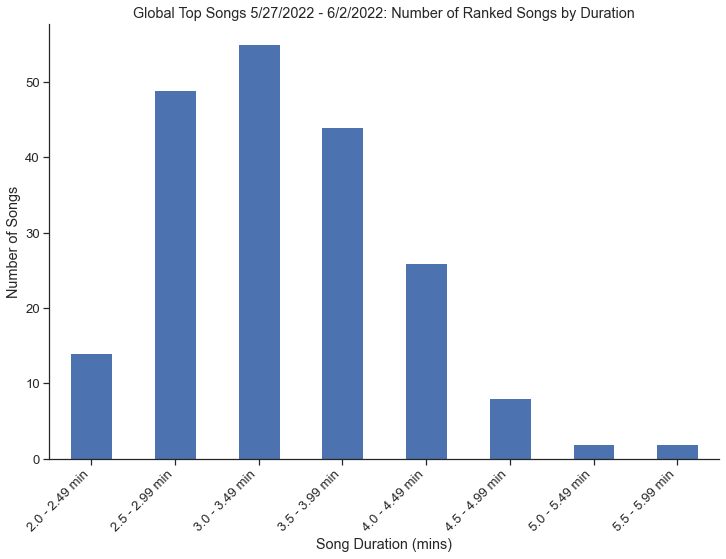

In [166]:
fig = duration_group.plot.bar(title="Global Top Songs 5/27/2022 - 6/2/2022: Number of Ranked Songs by Duration",xlabel="Song Duration (mins)",ylabel="Number of Songs", rot=45)
plt.xticks(ha="right")


#save as png
plt.savefig("images/duration_bar.png",bbox_inches='tight')
plt.show()

In [157]:
duration_streams = full_track_data.groupby("duration_bins").agg({'streams':['sum']}) 

In [158]:
#duration_streams["streams"].rename(columns={"sum":""})
duration_streams

,streams
,sum
duration_bins,
2.0 - 2.49 min,135287531
2.5 - 2.99 min,546791060
3.0 - 3.49 min,549519200
3.5 - 3.99 min,449116396
4.0 - 4.49 min,282186824
4.5 - 4.99 min,86320015
5.0 - 5.49 min,12735014
5.5 - 5.99 min,17888593


In [159]:
#dataframe has two headers for column, this is dropping the top one
duration_streams.columns = duration_streams.columns.droplevel(0)
#renaming the column header that is left
duration_streams.rename(columns={"sum":"streams_sum"})

,streams_sum
duration_bins,
2.0 - 2.49 min,135287531
2.5 - 2.99 min,546791060
3.0 - 3.49 min,549519200
3.5 - 3.99 min,449116396
4.0 - 4.49 min,282186824
4.5 - 4.99 min,86320015
5.0 - 5.49 min,12735014
5.5 - 5.99 min,17888593


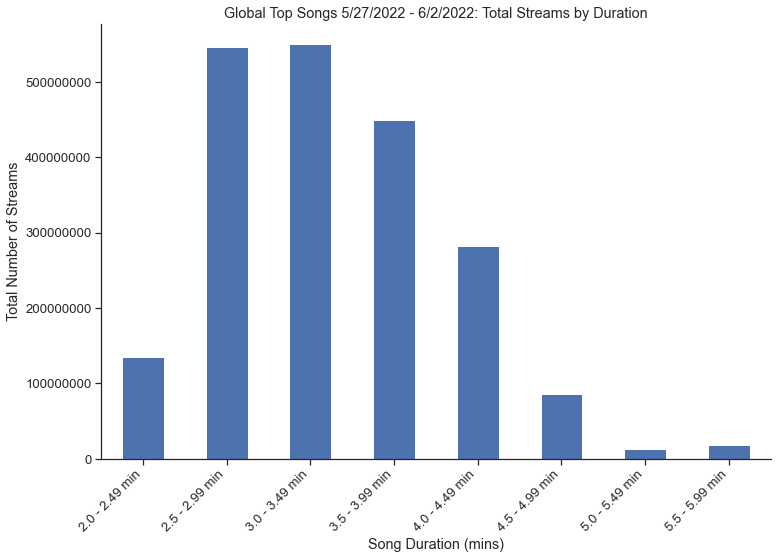

In [165]:
duration_streams.plot(kind='bar',title="Global Top Songs 5/27/2022 - 6/2/2022: Total Streams by Duration", xlabel="Song Duration (mins)", ylabel="Total Number of Streams", rot=45, legend=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ha="right")
plt.savefig("images/duration_streams_bar.png",bbox_inches='tight')
plt.show()

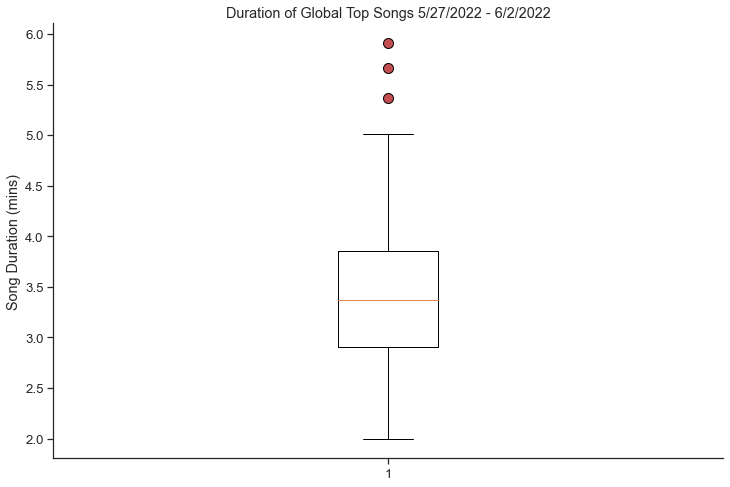

In [58]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=10)
fig1, ax1 = plt.subplots()
ax1.set_title('Duration of Global Top Songs 5/27/2022 - 6/2/2022')
ax1.set_ylabel('Song Duration (mins)')
ax1.boxplot(full_track_data["duration_mins"], flierprops=flierprops)

#save as png
plt.savefig("images/duration_boxplot.png")
plt.show()

In [20]:
#shortest_song = full_track_data.loc[full_track_data["duration_mins"] == 2]
#shortest_song[["rank","artist_names","track_name","weeks_on_chart","streams","duration_mins","duration_bins"]]


In [21]:
#look at outliers - what genre?
duration_outliers_df = full_track_data.loc[full_track_data["duration_mins"] > 5.01]
duration_outliers_df[["rank","artist_names","track_name","weeks_on_chart","streams","duration_mins","duration_bins"]]

,rank,artist_names,track_name,weeks_on_chart,streams,duration_mins,duration_bins
57,58,"Bad Bunny, Buscabulla",Andrea,4,11362643,5.66,5.5 - 5.99 min
136,137,Queen,Bohemian Rhapsody - Remastered 2011,192,6525950,5.91,5.5 - 5.99 min
148,149,Eminem,"Lose Yourself - From ""8 Mile"" Soundtrack",76,6302645,5.37,5.0 - 5.49 min


The r value is: -0.010469514805883429
The r-squared is: 0.00010961074027061232


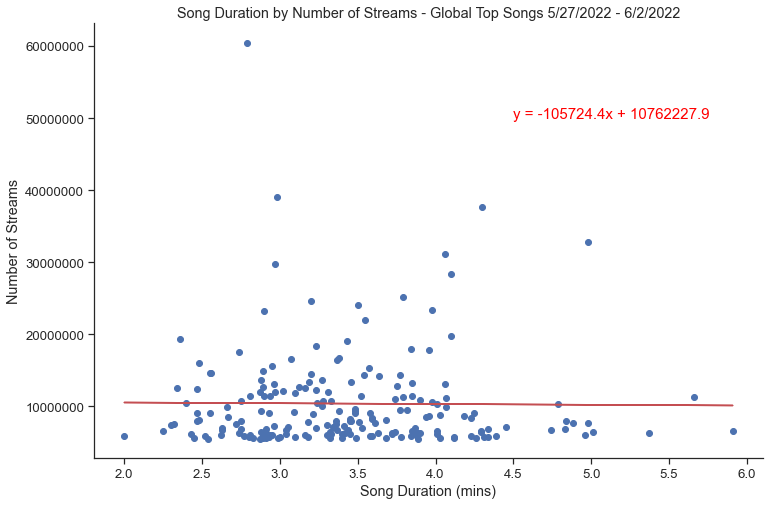

In [34]:
xvalues =full_track_data["duration_mins"]
yvalues = full_track_data["streams"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
#turn off scientific notation in axis
plt.ticklabel_format(style='plain')
# Set a Title and labels
plt.title("Song Duration by Number of Streams - Global Top Songs 5/27/2022 - 6/2/2022")
plt.xlabel("Song Duration (mins)")
plt.ylabel("Number of Streams")
#adding line equation to the scatter plot
plt.annotate(line_eq,(4.5,50000000),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

#save as png
plt.savefig("images/duration_streams.png")
plt.show()

The r value is: -0.039580404862229156
The r-squared is: 0.0015666084490579735


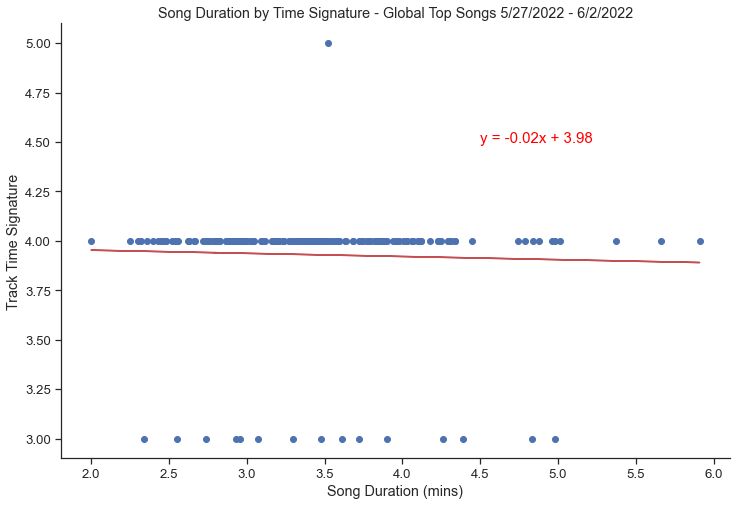

In [25]:
xvalues =full_track_data["duration_mins"]
yvalues = full_track_data["time_signature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
# Set a Title and labels
plt.title("Song Duration by Time Signature - Global Top Songs 5/27/2022 - 6/2/2022")
plt.xlabel("Song Duration (mins)")
plt.ylabel("Track Time Signature")
#adding line equation to the scatter plot
plt.annotate(line_eq,(4.5,4.5),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

#save as png
plt.savefig("images/duration_timesig.png")
plt.show()

The r value is: -0.1514019648207119
The r-squared is: 0.02292255495157208


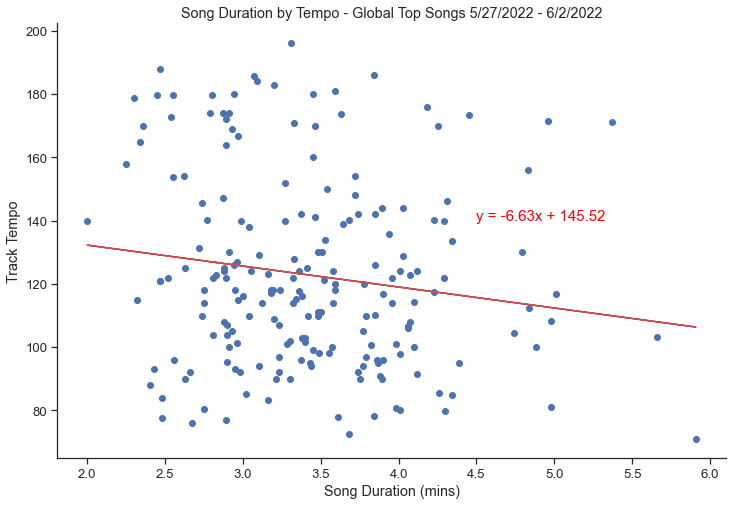

In [23]:
xvalues =full_track_data["duration_mins"]
yvalues = full_track_data["tempo"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
#adding title and labels
plt.title("Song Duration by Tempo - Global Top Songs 5/27/2022 - 6/2/2022")
plt.xlabel("Song Duration (mins)")
plt.ylabel("Track Tempo")
#adding line equation to the scatter plot
plt.annotate(line_eq,(4.5,140),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

#save as png
plt.savefig("images/duration_tempo.png")
plt.show()

The r value is: -0.11635909402959758
The r-squared is: 0.013539438763388732


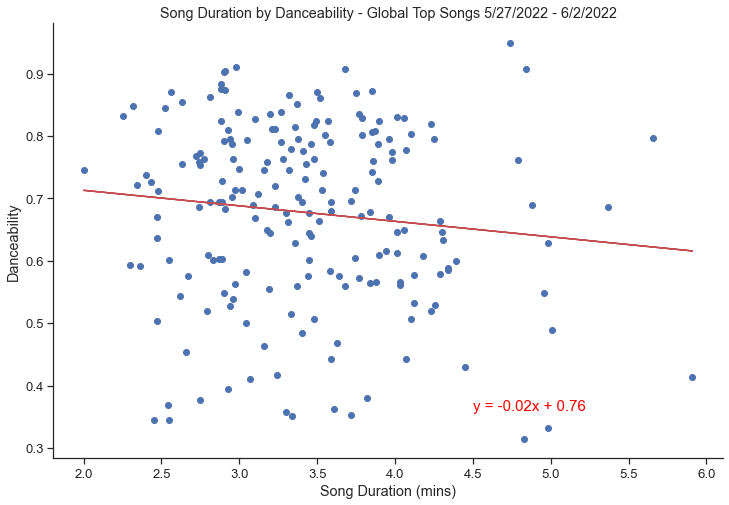

In [24]:
xvalues =full_track_data["duration_mins"]
yvalues = full_track_data["danceability"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
#adding title and labels
plt.title("Song Duration by Danceability - Global Top Songs 5/27/2022 - 6/2/2022")
plt.xlabel("Song Duration (mins)")
plt.ylabel("Danceability")
#adding line equation to the scatter plot
plt.annotate(line_eq,(4.5,.36),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

#save as png
plt.savefig("images/duration_danceability.png")
plt.show()

The r value is: -0.03387166649520214
The r-squared is: 0.001147289791162199


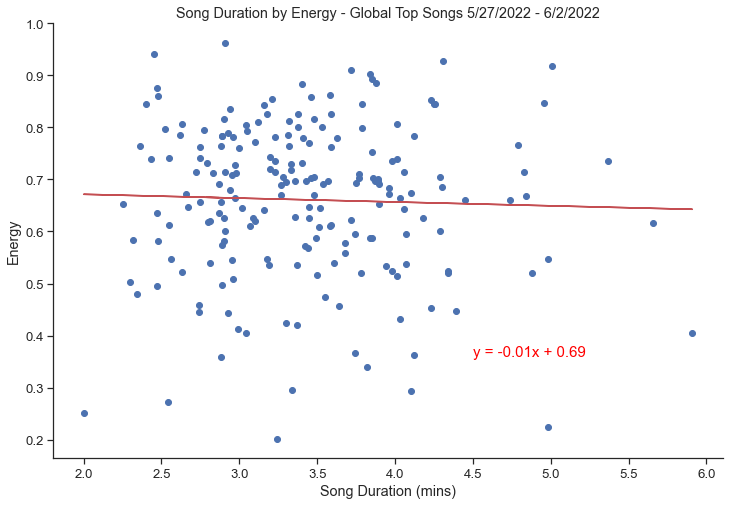

In [25]:
xvalues =full_track_data["duration_mins"]
yvalues = full_track_data["energy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
#adding title and labels
plt.title("Song Duration by Energy - Global Top Songs 5/27/2022 - 6/2/2022")
plt.xlabel("Song Duration (mins)")
plt.ylabel("Energy")
#adding line equation to the scatter plot
plt.annotate(line_eq,(4.5,.36),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

#save as png
plt.savefig("images/duration_energy.png")
plt.show()

The r value is: 0.15595840387460344
The r-squared is: 0.024323023739113922


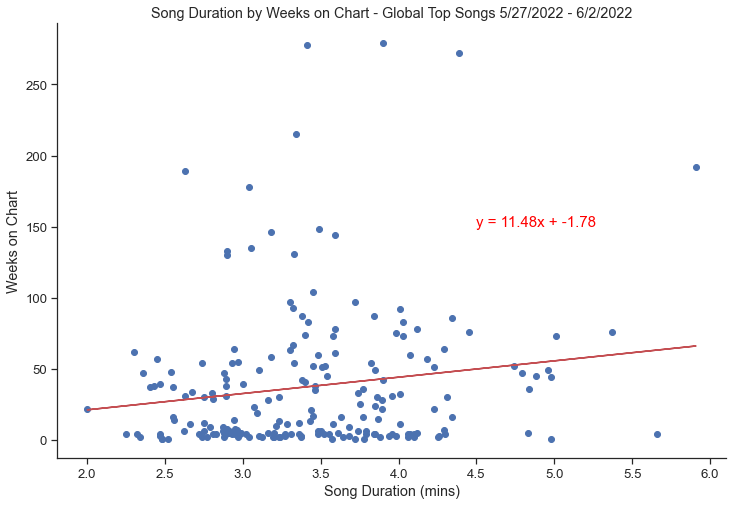

In [26]:
xvalues =full_track_data["duration_mins"]
yvalues = full_track_data["weeks_on_chart"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
#adding title and labels
plt.title("Song Duration by Weeks on Chart - Global Top Songs 5/27/2022 - 6/2/2022")
plt.xlabel("Song Duration (mins)")
plt.ylabel("Weeks on Chart")
#adding line equation to the scatter plot
plt.annotate(line_eq,(4.5,150),fontsize=15,color="red")
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

#save as png
plt.savefig("images/duration_weeks-on-chart.png")
plt.show()